In [1]:
import pandas as pd
import numpy as np

In [2]:
import bt

In [3]:
data = bt.get('aapl,msft,goog,gm,ge')

### a baseline portfolio, monthly rebalancing with equal weights

In [4]:
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

### in backtest, set commissions

In [5]:
test = bt.Backtest(s, data, initial_capital=1_000_000,commissions=lambda q,p:max(60,abs(q)*0.005))
res = bt.run(test)

<AxesSubplot:title={'center':'Equity Progression'}>

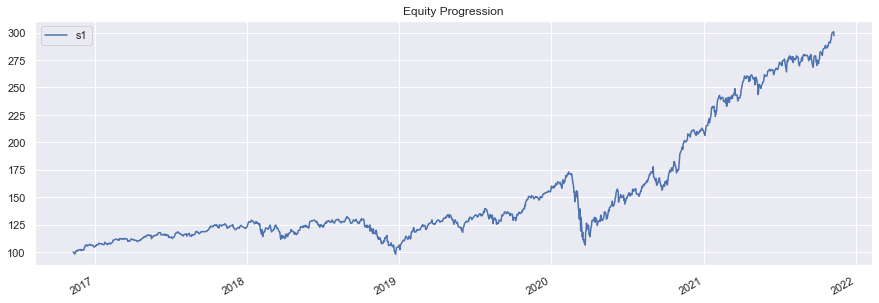

In [6]:
res.plot()

### set customized weights, one could use their wisdom to decide on the weights

In [7]:
weights = data.copy()

In [8]:
for c in list(data):
    weights[c] = 0.2

In [9]:
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighTarget(weights),
                       bt.algos.Rebalance()])

In [10]:
test = bt.Backtest(s, data, initial_capital=1_000_000,commissions=lambda q,p:max(60,abs(q)*0.005))
res = bt.run(test)

<AxesSubplot:title={'center':'Equity Progression'}>

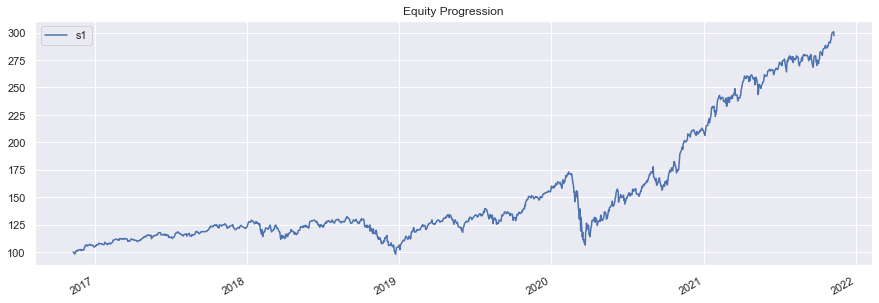

In [11]:
res.plot()

### More transaction costs considerations - discuss during the lecture